# Исследование надежности заемщиков


## Загрузка и изучение общей информации о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Ответы на вопросы исследования

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,children,Кол-во клиентов,Кол-во должников,Доля невозврата
4,4,41,4,0.097561
2,2,2052,194,0.094542
1,1,4808,444,0.092346
3,3,330,27,0.081818
0,0,14091,1063,0.075438
5,5,9,0,0.000000


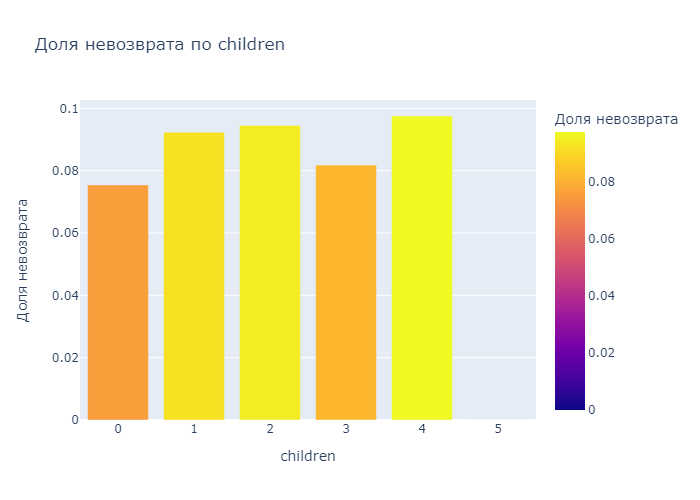

In [22]:
import plotly.express as px

def pivot(data, index):
    
    pivot = data.pivot_table(index = index, values = 'debt', aggfunc = ['count', 'sum', 'mean']).reset_index()
    pivot.columns = [index, 'Кол-во клиентов', 'Кол-во должников', 'Доля невозврата']
    display(pivot.sort_values('Доля невозврата', ascending = False))
    
    fig = px.bar(pivot, x = index, y = 'Доля невозврата', color = 'Доля невозврата', title = 'Доля невозврата по ' + index)
    #fig.show()
    fig.show("png")
    
pivot(data, 'children')

<Axes: xlabel='children', ylabel='debt'>

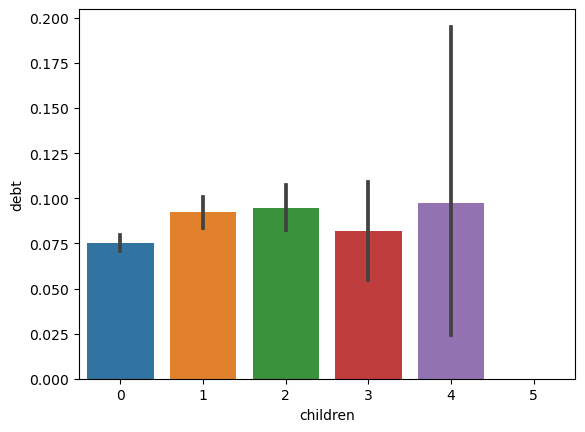

In [23]:
#альтернативный вариант
import seaborn as sns
sns.barplot(data=data, x='children', y='debt')

**Вывод:**
<br>
1. Процент должников среди заёмщиков не имеющих детей меньше чем у заёмщиков с детьми. В нашем случае, не превышает 7,6%.
2. Процент должников среди семей имеющих одного или двух детей, приблизительно, одинаков лежит в диапазоне 9,2% - 9,5%.
3. Для многодетных семей (>=3) количество доступных данных по каждой группе не позволяет сделать релевантные выводы.


#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status,Кол-во клиентов,Кол-во должников,Доля невозврата
0,Не женат / не замужем,2796,273,0.097639
3,гражданский брак,4134,385,0.093130
4,женат / замужем,12261,927,0.075606
1,в разводе,1189,84,0.070648
2,вдовец / вдова,951,63,0.066246


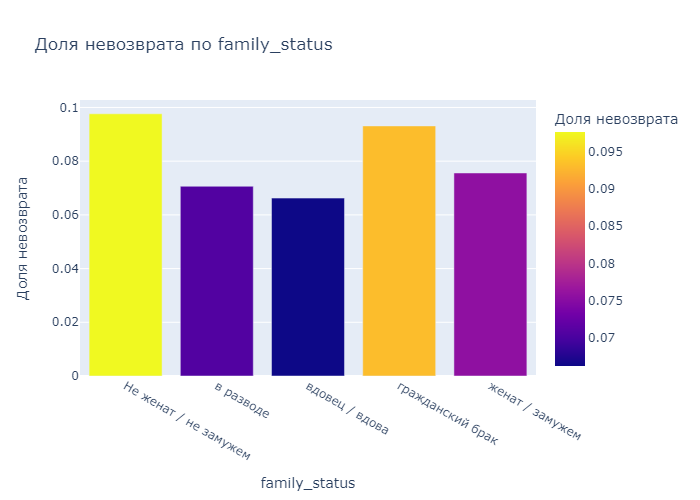

In [24]:
pivot(data, 'family_status')

**Вывод:**
<br>
1. Наибольшее количество должников находится в группе заёмщиков, которые пока ещё не вступали в семейные отношения (процент невозврата ~ 9.8%)
2. Наименьшее количество должников среди тех, кто в настоящий момент уже не состоит в семейных отношениях: в разводе (~ 7,1%) или являются вдовцом/вдовой (~ 6,6%).
3. Заёмщики, состоящие в семейных отношениях имеют средние показатели задолженности. При этом, для состоящих в гражданском браке процент должников (~ 9,3%) значительно выше чем у официально оформивших отношения (~ 7,6%).   

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,total_income_category,Кол-во клиентов,Кол-во должников,Доля невозврата
4,E,22,2,0.090909
2,C,15921,1353,0.084982
0,A,25,2,0.080000
1,B,5014,354,0.070602
3,D,349,21,0.060172


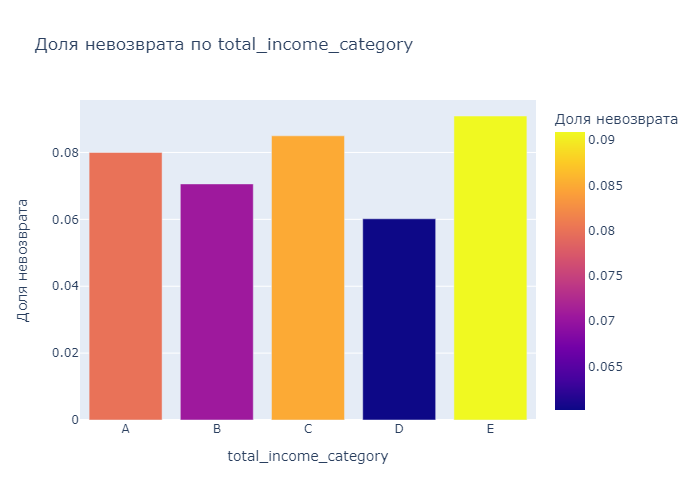

In [25]:
pivot(data, 'total_income_category')

<Axes: xlabel='total_income_category', ylabel='debt'>

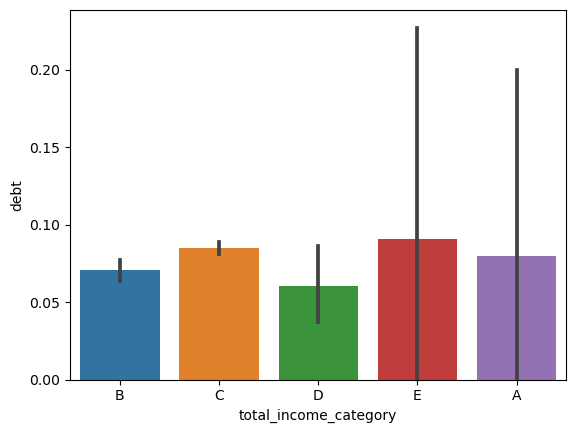

In [26]:
#альтернативный вариант
sns.barplot(data=data, x='total_income_category', y='debt')

**Вывод:** 
<br>
1. Ввиду недостаточности данных по группам A (> 1 млн), D (> 30 <= 50 тыс) и E (<= 30 тыс) получаем высокую погрешность, которая не позволяет сделать однозначные выводы.
2. Наибольшее количество должников в группе С (> 50 <= 200 тыс) ~ 8,5% 
3. Меньшее количество должников в группе В (> 200 тыс < 1 млн) ~ 7%

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,purpose_category,Кол-во клиентов,Кол-во должников,Доля невозврата
0,операции с автомобилем,4279,400,0.093480
2,получение образования,3988,369,0.092528
3,проведение свадьбы,2313,183,0.079118
1,операции с недвижимостью,10751,780,0.072551


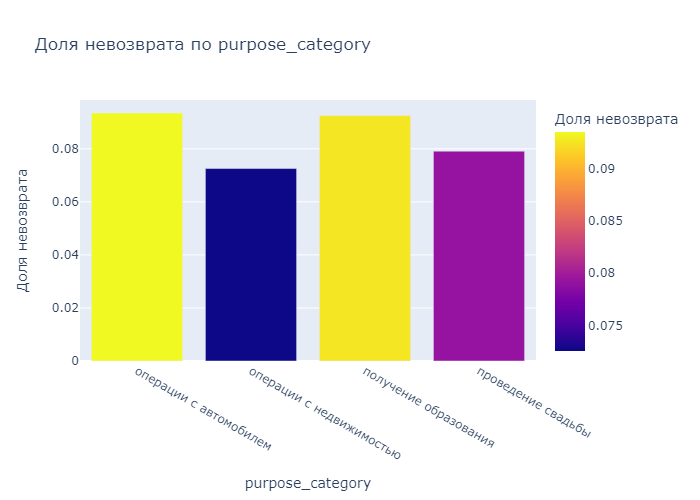

In [27]:
pivot(data, 'purpose_category')

**Вывод:**
<br>
1. Наибольшее количество должников получили кредит на операции с автомобилем ~ 9.3%
2. Наименьшее количество должников на операции с недвижимостью ~ 7.3%
3. Процент должников среди получивших кредит на образование ~ 9,3%
4. Процент должников среди получивших кредит на проведение свадьбы ~ 7,9%

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*  пропуски в данных возможны по/из-за:
- техническим причинам (сбой при выгрузке данных),
- ошибок в логике программы, форматах предоставления данных
- нежелания клиентов предоставлять ту или иную информацию (если она не является обязательной при заполнении регистрационной формы)
- ошибок ручного ввода

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 
Заполнение пропусков для количественных пременных медианными значениями позволяет избежать 'выбросов' (значительного отклонения от общих значений ряда данных), которые могут произойти, например, в случае рассчёта среднего значения, если в выборке находятся экстремальные значения (что может привести к недостоверности картины для последующего анализа).

### Шаг 4: общий вывод.

1. При подготовке к проведению исследования исходная база данных была модифицирована следующим образом :

    - ввиду отсутствия в некоторых строках данных о доходах, отсутствующие значения были заполенны медианными соответственно типу занятости.
    - количества дней трудового стажа с отрицательными значениями были переведены в положительные
    - убраны строки с аномальным данными по количеству детей
    - ввиду отсутствия в некоторых строках данных о трудовом стаже, отсутствующие значения были заполенны медианными соответственно типу занятости.
    - обработаны неявные дубликаты в столбце education посредством приведения к единому регистру
    - удалены строки дубликаты
    - проведена и отражена в отдельном столбце категоризация по уровню дохода
    - проведена и отражена в отдельном столбце категоризация по целям кредитования
<br>
<br>
2. Рекомендации по улучшению входных данных и данных для исследований
    - в анкете, поля о доходе и стаже сделать обязательными к заполнению
    - добавить автопроверку на формат для вводимых клиентом данных (attention: трудовой стаж, количество детей)
    - проработать вариант иной категоризации по доходам, либо рассчитать другие метрики (отношение дохода к сумме выплат и т.п.)
<br>
<br>
3. Проведённые исследования зависимости различных групп критериев и возвратом кредита в срок дают, на текущих данных, следующую картину:

    3.1. зависимость между количеством детей и возвратом кредита в срок
    - высокий риск: заёмщики имеющие одного или двух детей
    - низкий риск: заёмщики не имеющие детей
    - риск не определён: ввиду недостаточности данных по группам многодетные дети (с количеством детей больше 3-ёх) получаем высокую погрешность, которая не позволяет сделать однозначные выводы.

    3.2. зависимость между семейным положением и возвратом кредита в срок
    - высокий риск: заёмщики, которые пока ещё не вступали в семейные отношения
    - низкий риск: заёмщики, которые в настоящий момент уже не состоят в семейных отношениях: в разводе или являются вдовцом/вдовой.
    
    3.3. зависимость между уровнем дохода и возвратом кредита в срок
    - высокий риск: заёмщики с уровнем дохода от 50 до 200 тыс. руб. (группа С).
    - низкий риск: заёмщики с уровнем дохода от 200 тыс. до 1 млн. руб. (группа B)
    - риск не определён: ввиду недостаточности данных по группам A (> 1 млн), D (> 30 <= 50 тыс) и E (<= 30 тыс) получаем высокую погрешность, которая не позволяет сделать однозначные выводы.
    
    3.4. влияние разных целей кредита на его возврат в срок
    - высокий риск: заёмщики с целью проведения операций с автомобилем
    - низкий риск: заёмщики с целью проведения операций с недвижимостью
    
Приведённые выше оценки рисков позволяют получить портреты идеального заёмщика и противоположного ему.    